In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [4]:
# Inspect the dataset
data.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443651 entries, 0 to 2443650
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   uid                int64  
 1   asin               object 
 2   title              object 
 3   stars              float64
 4   reviews            int64  
 5   price              float64
 6   isBestSeller       bool   
 7   boughtInLastMonth  int64  
 8   category           object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 151.5+ MB


In [6]:
# PART 1: Understanding Product Categories
# Step 1: Frequency Analysis
category_counts = data['category'].value_counts()
print("Frequency table for product categories:")
print(category_counts)

Frequency table for product categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64


In [7]:
# Top 5 categories
top_5_categories = category_counts.head(5)
print("\nTop 5 categories:")
print(top_5_categories)


Top 5 categories:
category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64


C:\Users\valer\AppData\Local\Temp\ipykernel_88148\542890699.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_categories.index, y=top_20_categories.values, palette="Set3");


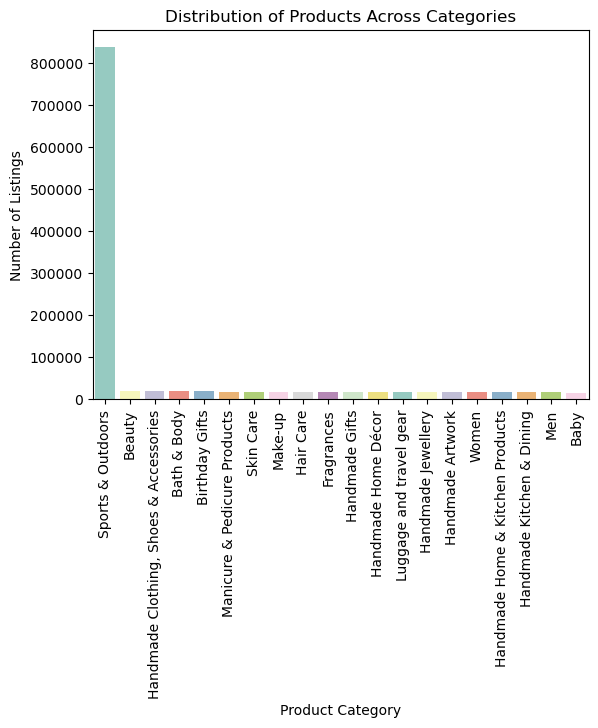

In [8]:
# Step 2: Visualizations
# Bar chart for top 20 categories

top_20_categories = category_counts.head(20)
sns.barplot(x=top_20_categories.index, y=top_20_categories.values, palette="Set3");
plt.title("Distribution of Products Across Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Listings")
plt.xticks(rotation=90)
plt.show()

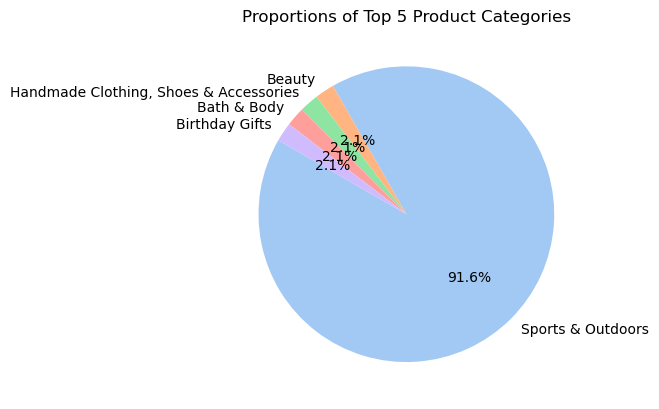

In [9]:
# Pie chart for top 5 categories
top_5_categories.plot(kind="pie", autopct='%1.1f%%', startangle=150, colors=sns.color_palette("pastel"))
plt.title("Proportions of Top 5 Product Categories")
plt.ylabel("")  # Remove y-axis label for cleaner visualization
plt.show()

In [10]:
# PART 2: Delving into Product Pricing
# Clean the 'price' column 
data['price'] = pd.to_numeric(data['price'], errors='coerce')
data = data.dropna(subset=['price'])

In [11]:
# Step 1: Central Tendencies
mean_price = data['price'].mean()
median_price = data['price'].median()
mode_price = data['price'].mode()[0]

print(f"Mean price: {mean_price:.2f}")
print(f"Median price: {median_price:.2f}")
print(f"Mode price: {mode_price:.2f}")


Mean price: 89.24
Median price: 19.09
Mode price: 9.99


In [12]:
# Step 2: Dispersion
price_variance = data['price'].var()
price_std_dev = data['price'].std()
price_range = data['price'].max() - data['price'].min()
price_iqr = np.percentile(data['price'], 75) - np.percentile(data['price'], 25)

print(f"Price Variance: {price_variance:.2f}")
print(f"Price Standard Deviation: {price_std_dev:.2f}")
print(f"Price Range: {price_range:.2f}")
print(f"Price Interquartile Range (IQR): {price_iqr:.2f}")

Price Variance: 119445.49
Price Standard Deviation: 345.61
Price Range: 100000.00
Price Interquartile Range (IQR): 36.00


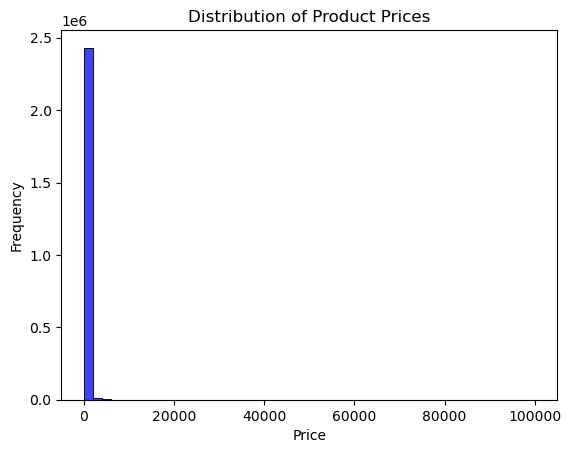

In [13]:
# Step 3: Visualizations
# Histogram
sns.histplot(data['price'], bins=50, color="blue")
plt.title("Distribution of Product Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

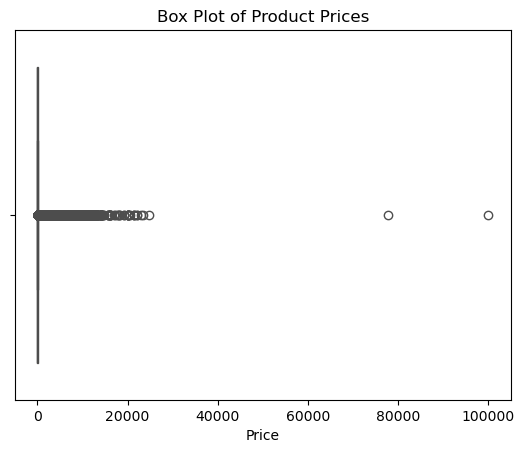

In [14]:
# Box plot
sns.boxplot(x=data['price'], color="orange")
plt.title("Box Plot of Product Prices")
plt.xlabel("Price")
plt.show()

In [16]:
# PART 3: Unpacking Product Ratings
# Clean the 'rating' column
data['stars'] = pd.to_numeric(data['stars'], errors='coerce')
data = data.dropna(subset=['stars'])

In [17]:
# Step 1: Central Tendencies
mean_rating = data['stars'].mean()
median_rating = data['stars'].median()
mode_rating = data['stars'].mode()[0]

print(f"\nMean rating: {mean_rating:.2f}")
print(f"Median rating: {median_rating:.2f}")
print(f"Mode rating: {mode_rating:.2f}")


Mean rating: 2.15
Median rating: 0.00
Mode rating: 0.00


In [19]:
# Step 2: Dispersion
rating_variance = data['stars'].var()
rating_std_dev = data['stars'].std()
rating_iqr = np.percentile(data['stars'], 75) - np.percentile(data['stars'], 25)

print(f"\nRating Variance: {rating_variance:.2f}")
print(f"Rating Standard Deviation: {rating_std_dev:.2f}")
print(f"Rating Interquartile Range (IQR): {rating_iqr:.2f}")


Rating Variance: 4.82
Rating Standard Deviation: 2.19
Rating Interquartile Range (IQR): 4.40


In [20]:
# Step 3: Distribution Analysis
rating_skewness = data['stars'].skew()
rating_kurtosis = data['stars'].kurtosis()

print(f"\nRating Skewness: {rating_skewness:.2f}")
print(f"Rating Kurtosis: {rating_kurtosis:.2f}")


Rating Skewness: 0.08
Rating Kurtosis: -1.93


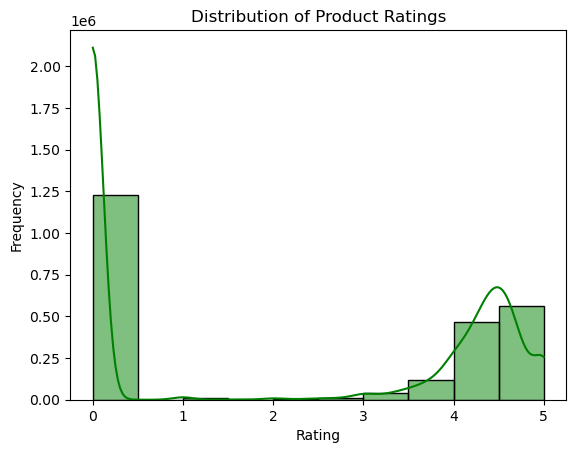

In [21]:
# Step 4: Visualizations
# Histogram
sns.histplot(data['stars'], bins=10, kde=True, color="green")
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

# Amazon UK Product Analysis Summary

## Product Categories
- **Dominant Category**: *Sports & Outdoors* accounts for 836,265 listings, significantly more than any other category.
- **Other Top Categories**: *Beauty* (19,312), *Handmade Clothing, Shoes & Accessories* (19,229), *Bath & Body* (19,092), and *Birthday Gifts* (18,978).
- The vast dominance of *Sports & Outdoors* indicates a high concentration in this area.

## Product Pricing
- **High Variability**: Prices range widely from £0 to £100,000, with a variance of 119,445.49 and a standard deviation of £345.61.
- **Price Concentration**: Most prices are within a narrow interquartile range (IQR) of £36, indicating that a majority of products are relatively affordable.
- **Outliers**: Numerous high-priced products create a long tail in the distribution.

## Product Ratings
- **Low Average Ratings**: The mean rating is 2.15, but the median and mode are 0.00, indicating many unrated products.
- **Moderate Variability**: Ratings have a variance of 4.82, a standard deviation of 2.19, and an IQR of 4.40, suggesting a wide spread of ratings.
- **Distribution Characteristics**: Slightly positively skewed (skewness = 0.08) and flatter than a normal distribution (kurtosis = -1.93).
- Many products appear to lack customer feedback or reviews, skewing the distribution towards zero.

---
